In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from scipy.misc import derivative
import scipy.integrate as intg
import scipy as sp

### Now we train another neural network for z and $D_L(z)$

In [2]:
file = '../data/jla_binned_distances_31nodes_v1.txt'

# filefull = '/home/cosmocicatais/Documents/github/neuralCosmoReconstruction/data/jla_lcparams.txt'
syscov = np.loadtxt('../data/cov_jla_binned_distances_31nodes_v1.txt',skiprows=1).reshape((31,31))
# syscov = np.loadtxt('../data/jla_v0_covmatrix.dat',skiprows=1).reshape((740,740))
# data = pd.read_csv(file2, names=['z', '$D_L$'], sep = " ", skiprows=3)
# data = np.loadtxt(file, usecols=[1,4], skiprows=1)
data = np.loadtxt(file, skiprows=3)
nsize = len(syscov)
# print(data.head(31))
# data.head(31) 
# plt.savefig("DistbinnedJLA.png")
np.shape(syscov)

errors = np.diag(syscov).reshape(nsize,1)
errors = np.where(errors!= 0, np.log(errors), 0)
np.shape(errors)
len(data), len(errors)

(31, 31)

In [3]:
# shuffle = [x for x in range(len(data)) if x%2 == 0]
# comp = [x for x in range(len(data)) if x%2 ==1]
# shuffle.extend(comp)

shuffle = [0,30,1,2,3,4,5,6,7,8,28,26,24,22,20,9,10,12,14,16,18,29,27,25,23,21,19,17,15,13,11]
data = data[shuffle]

errors= errors[shuffle]
len(data), len(errors), len(shuffle)

(31, 31, 31)

In [4]:
dl = data[:,1]
z = data[:,0]
np.shape(z), np.shape(dl), np.shape(errors), len(data)

((31,), (31,), (31, 1), 31)

In [5]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]

zz = np.log10(z)
# scalerz = MinMaxScaler(feature_range=(-1,1))
# scalerz.fit(z.reshape(-1, 1))
# zz = scalerz.transform(z.reshape((-1,1)))
# zz=z

scalerdl = StandardScaler()
# scalerdl = MinMaxScaler(feature_range=(0,1))
scalerdl.fit(dl.reshape(-1, 1))
dll = scalerdl.transform(dl.reshape((-1,1)))
# dll = dl.reshape(nsize, 1)
# scalererr = StandardScaler()
# scalererr.fit(errors.reshape(-1, 1))
# errscl = scalererr.transform(errors.reshape((-1,1)))

z_train, z_test = np.split(zz, indx)
y = dll
# y = np.concatenate((dll, errors), axis=1)
y_train, y_test = np.split(y, indx)
# dll

In [6]:
def model(input_z):
    efirst = Dense(100,activation='relu', input_shape=(1,))(input_z)
#     x = Dense(100, activation='relu')(efirst)


    elast = Dense(1,activation='linear')(efirst)
    return elast

batch_size = 1
epochs = 150
# epochs = 500
input_z = Input(shape = (1,))
neural_model = Model(input_z, model(input_z))
neural_model.compile(loss='mean_squared_error', optimizer = "adam")
neural_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_train = neural_model.fit(z_train, y_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_data=(z_test, y_test))
#                                     callbacks=callbacks)

Epoch 1/150
24/24 [==============================] - 0s 10ms/step - loss: 0.9502 - val_loss: 0.3371
Epoch 2/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6958 - val_loss: 0.3572
Epoch 3/150
24/24 [==============================] - 0s 1ms/step - loss: 0.5684 - val_loss: 0.3552
Epoch 4/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6705 - val_loss: 0.3162
Epoch 5/150
24/24 [==============================] - 0s 1ms/step - loss: 0.4723 - val_loss: 0.2666
Epoch 6/150
24/24 [==============================] - 0s 1ms/step - loss: 0.5013 - val_loss: 0.2179
Epoch 7/150
24/24 [==============================] - 0s 1ms/step - loss: 0.3316 - val_loss: 0.1564
Epoch 8/150
24/24 [==============================] - 0s 1ms/step - loss: 0.3964 - val_loss: 0.1056
Epoch 9/150
24/24 [==============================] - 0s 1ms/step - loss: 0.2337 - val_loss: 0.0615
Epoch 10/150
24/24 [==============================] - 0s 1ms/step - loss: 0.1095 - val_loss: 0.0259
Epoch 11

Epoch 81/150
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 9.3126e-04
Epoch 82/150
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 1.8753e-04
Epoch 83/150
24/24 [==============================] - 0s 1ms/step - loss: 8.5965e-04 - val_loss: 4.6007e-04
Epoch 84/150
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 85/150
24/24 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 2.2159e-04
Epoch 86/150
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 2.5081e-04
Epoch 87/150
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 1.7979e-04
Epoch 88/150
24/24 [==============================] - 0s 1ms/step - loss: 7.0824e-04 - val_loss: 2.9167e-04
Epoch 89/150
24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 2.6639e-04
Epoch 90/150
24/24 [==============================] - 0s 1ms

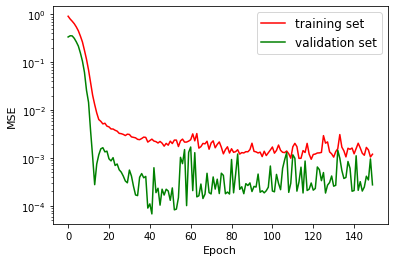

In [8]:
# plt.figure(figsize=(4, 3), dpi=100)
# plt.figure(figsize=(7, 4), dpi=100)

plt.plot(model_train.history['loss'], color='r', )
plt.plot(model_train.history['val_loss'], color='g')
plt.ylabel('MSE', fontsize=11)
plt.xlabel('Epoch', fontsize=11)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
# plt.hlines(0.1, 0, 100)
# plt.text(160, 500, '300 epochs', fontsize=12)
# plt.title('FFNN', fontsize=8)
# plt.savefig("loss_dlbinnedJla_.png")

In [9]:
unet = np.sqrt(np.min(model_train.history['val_loss']))
model_train.history['loss'][-1], model_train.history['val_loss'][-1], model_train.history['val_loss'][-2]

(0.0012002467410638928, 0.0002752354776021093, 0.0009560268372297287)

In [10]:
# ranz = np.linspace(np.min(z), np.max(z), 31)
ranz = z

# # ranz = np.arange(0.0, 1.5, 0.01)
# ranzz = scalerz.transform(ranz.reshape((-1,1)))

# ranzinv = scalerz.transform(ranz.reshape(-1,1))
# pred_random = neural_model.predict(ranz)

pred_random = neural_model.predict(zz)
# pred_random
dlfake  = scalerdl.inverse_transform(pred_random[:,0].reshape(-1,1)).reshape(nsize,)
# dlfake = pred_random.reshape(31,)
# errfake = pred_random[:,1]                                     
# dlfake = pred_random[:,0]

In [11]:
np.shape(z), np.shape(dlfake), len(z)

((31,), (31,), 31)

In [12]:
index = np.argsort(ranz)
ranz = ranz[index]

# dlfake = dlfake.reshape(31,)[index]

# fake_data = np.stack((z, dlfake[index]), axis=1)
fake_data = np.stack((ranz, dlfake[index]), axis=1)

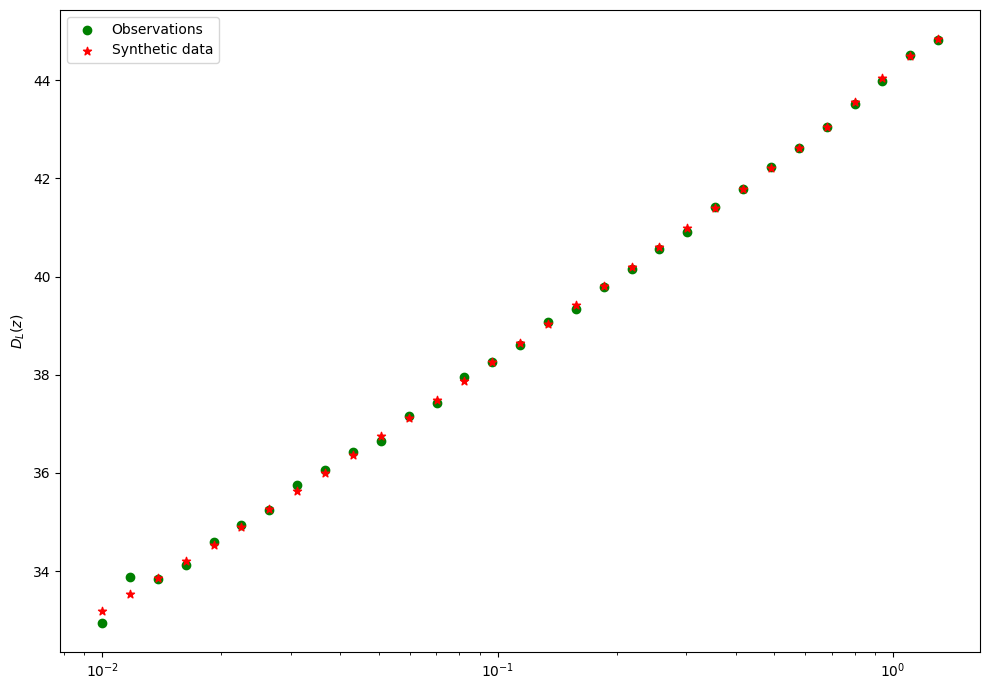

In [13]:
plt.figure(figsize=(10, 7), dpi=100)

plt.scatter(z, dl, c='g', label='Observations')
plt.scatter(z, dlfake, c='r', label='Synthetic data', marker='*')

plt.ylabel("$D_L(z)$")
plt.xscale('log')
# plt.xlim(-0.1, np.max(z)+0.2)
plt.tight_layout()
plt.legend()
# plt.savefig('rec_jla_ffnn.png')

In [14]:
# np.savetxt("fake_binned_JLA.dat",  fake_data, delimiter= " ", header="#fake data\n# z\n# mu", fmt='%1.9f')

In [15]:
neural_model.save('../models/FFNN_JLA2.h5')

In [16]:
# plt.scatter(z, np.exp(errors), c='g', label='Real errors')
# plt.scatter(z, np.exp(errfake), c='r', label='synthetic errors')
# plt.legend()
# Revisar negativos y usar log. 